# Марковская цепь

Материалы и датасеты для занятия можно найти в [репозитории](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4) GitHub или на [гугл-диске](https://drive.google.com/drive/folders/1Y1kXHasr5_hompZatPmdGaRkDYoxxqQ3?usp=sharing)

Пусть $E$ - некоторое дискретное (конечное или счётное) множество, которое называют пространством состояний.

**Примеры:**
- $E1=\{солнечно,пасмурно,дождь,снег\}$ - пространство погодных условий
- $E2=\{а,б,…,я\}$ - пространство кириллических букв
- $E3=ℕ=\{0,1,…,\}$ - пространство целых чисел (число студентов в классе)

Если система находится в состоянии $i \in E$ в момент времени $n$, то в момент времени $n+1$ она может перейти в состояние $j \in E$ с переходной вероятностью $p_{ij}$.

Например для кириллицы $p_{п,р}=0.278$  $p_{п,ы}=0.009$

# Оценка матрицы переходных вероятностей

Дана последовательность наблюдений

$X_1,X_2,…,X_N X_i \in E$.

Как подсчитать матрицу переходных вероятностей $p_{ij}=P(X_{n+1}=j|X_n=i)$?

**Закон больших чисел:**
Частота некоторого события в серии независимых испытаний приближается (и остается близкой) к его вероятности:

$\nu_n(A) \to P(A) (n \to \infty), \nu_n(A)= \dfrac{n_A}{n}$
$p_{ij}=P(X_{n+1}=j|X_n=i)\approx \dfrac{1}{N} \sum\limits_{n=1} I(X_{n+1}=j|X_n=i)$

In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [38]:
with open('alice_en.txt', 'r') as f: #encoding='koi8-r'
    text = f.read().lower()
text = re.sub('[^a-z]','', text)

In [39]:
ENGLISH = 'abcdefghijklmnopqrstuvwxyz'
POS = {l: i for i, l in enumerate(ENGLISH)}

In [40]:
probabilities = np.zeros((len(ENGLISH), len(ENGLISH)))

In [41]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [42]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [43]:
df = pd.DataFrame(probabilities, index=(c for c in ENGLISH), columns=(c for c in ENGLISH))

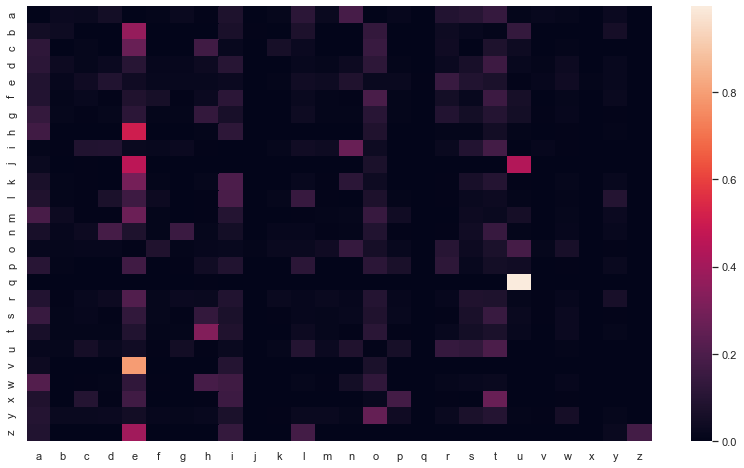

In [44]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

### Практика - постройте матрицу вероятности для русской версии книги

/Users/aleksandr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


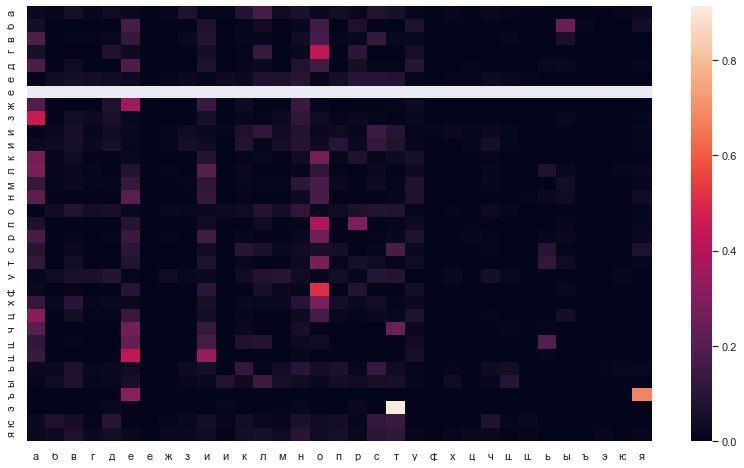

In [36]:
with open('alice_ru.txt', 'r', encoding='koi8-r') as f:
    text_ru = f.read().lower()

text_ru = re.sub('[^а-я]', '', text_ru)

RU = 'абвгдеёжзийклмнопрстуфхцчшщьыъэюя'
POS = {l: i for i, l in enumerate(RU)}

probabilities = np.zeros((len(RU), len(RU)))

for cp, cn in zip(text_ru[:-1], text_ru[1:]):
    probabilities[POS[cp], POS[cn]] += 1

probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

df = pd.DataFrame(probabilities, index=(c for c in RU), columns=(c for c in RU))

plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

# Траектория в цепи

Теперь вопрос: допустим, что у нас есть какая-то траектория (последовательность состояний). Какова её вероятность? Ответ на этот вопрос даст одна простая теорема.

**Теорема о состояниях марковской цепи**

Для любого натурального $n$ и любых $i_0,i_1,…,i_{n−1},i,j$

$P(X_0=i_0,X_1=i_1,…,X_n=i_n)=α_{i_0}p_{i_0i_1}…p{i_{n−1}i_n}.$

Пример: Пусть вероятность начального состояния цепи для букв английского алфавита равна $\dfrac{1}{26}$.
Чему равна вероятность наблюдать строку "hello"?

In [45]:
string = "hello"
proba = 1.0 / 26
for cp, cn in zip(string[1:], string[:-1]):
    proba *= probabilities[POS[cp], POS[cn]]
print(proba)

5.348363016330027e-07


**Следствие.** Для любого натурального $n$ и любого $i_n \in E$

$P(X_n=i_n) = \sum \limits_{i_0,…,i_{n−1} \in E} \alpha i_0p_{i_0i_1}…p_{i_{n−1}i_n}$.

Но обычно нас не интересует полный путь, а лишь начало и конец. Поэтому вводят вероятность перейти из состояния $i$ в состояние $j$ за $n$ шагов:

$p_{ij}^{(n)}=P(X_n=j|X_0=i)$

Чему равна эта вероятность?

$P(X_n=j|X_0=i)=\dfrac{P(X_n=j,X_0=i)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} \dfrac{P(X_0=i, X_1=i_1,...,X_{n-1}=i_{n-1}, X_n = j)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} p_{ii_1}...p_{i_{n-1}j}$

Если мы посмотрим на случай $n=2$, то полученное выражение очень похоже на скалярное произведение строк матрицы переходной вероятности. Оказывается, что это не так уж и далеко от истины.

**Теорема.** Пусть $P^{(n)}=(p_{ij}^{(n)}) i,j \in E$. Тогда $P^{(n)}=P⋅P⋅…⋅P=P^n$

**Вопрос:** как подсчитать вероятность, что слово из 3 букв начинается на букву "h" и заканчивается на букву "y"?

In [46]:
start = POS['h']
end = POS['y']
prior = 1. / len(ENGLISH)
for c in ENGLISH:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    if proba > 0:
        print(''.join(['h', c, 'y']), proba)

hay 0.00019786241179454468
hby 3.2498131357446945e-06
hcy 2.5963886570530186e-07
hdy 2.00246712505073e-06
hey 0.00041670464060019366
hfy 2.4496387427496224e-06
hgy 2.2022341052346015e-07
hhy 3.0694052582470812e-06
hky 1.0202901705244971e-07
hly 6.987940162352581e-06
hmy 4.054691865351508e-06
hny 1.0187698076726042e-06
hoy 2.0758961455728112e-05
hpy 2.095534994542692e-06
hry 2.9097918521227684e-05
hsy 2.6301624264116166e-06
hty 2.5534949950507335e-05
huy 2.316043298098595e-07
hvy 3.0372085380791536e-08
hwy 6.902550257831721e-07
hyy 4.816238159185105e-06


Это работает не всегда. Почему же? Потому что никто не обещал, что переходная вероятность не зависит от шага. Если она действительно не зависит, то говорят, что марковская цепь однородна.

# Генерирование выборок из марковской цепи

Как создать реализацию длины $N$ из марковской цепи?
Сгенерировать начальное состояние согласно распределению $\alpha_i≡P(X_0=i)$, положить $n \leftarrow 0$.
Пока $n<N$, повторять:
- Имея контекст $X_n$, сгенерировать состояние $X_{n+1}$ из распределения $P(X_{n+1}|X_n)$
- Положить $n \leftarrow n+1$

In [49]:
s = []
start = np.random.choice(list(ENGLISH))
s.append(start)
length = 10
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(ENGLISH), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

rproofometd


### Практика: сгенерируйте все возможные комбинации строк из марковской цепи (длины 4) и отобразите их вероятность

In [57]:
def get_letter_and_proba(prev_letter=None):
    if prev_letter is None:
        for s in list(ENGLISH):
            yield s, 1.0 / 26
    else:
        p=POS[prev_letter]
        prob=probabilities[p]
        for s in list(ENGLISH):
            sp=POS[s]
            yield s, prob[sp]

In [66]:
d = {}

for s1, p1 in get_letter_and_proba():
    for s2, p2 in get_letter_and_proba(s1):
        for s3, p3 in get_letter_and_proba(s2):
            prob=p1*p2*p3
            if prob>0:
                d["{}".format(s1+s2+s3)]="{}".format(prob)
#                 d.setdefault("{}".format(s1+s2+s3), "{}".format(prob))
#                 print(s1+s2+s3, prob)

In [71]:
for k, v in d.items():
    print(k, v)
    if "aan" in k:
        break

aaa 4.840796504656876e-08
aab 1.2190005743545041e-06
aac 1.1573904370225076e-06
aad 2.2663729089984464e-06
aae 8.80144819028523e-09
aaf 4.796789263705451e-07
aag 1.1441882647370798e-06
aah 2.112347565668455e-07
aai 3.370954656879243e-06
aaj 6.601086142713921e-08
aak 6.028992010345381e-07
aal 5.003623296177152e-06
aam 1.0825781274050831e-06
aan 7.930104819446991e-06


# Модели временных рядов с переключениями

Обозначим $s_t$ ненаблюдаемую переменную состояния, принимающую значения 0 или 1. Простейшая модель переключения для переменной $z_t$ состоит из двух спецификаций типа AR:

$z_t = \begin{cases} \alpha_0 + \beta z_{t-1} + \epsilon_t, & s_t = 0 \\ \alpha_0 + \alpha_1 + \beta z_{t-1} + \epsilon_t, & s_t = 1 \end{cases}$
 
где $|\beta|<1$ и $\epsilon_t i.i.d.$ с нулевым средним и дисперсией $\sigma^2_\epsilon$.

In [73]:
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
s = np.random.binomial(n=1, p=0.8, size=100)
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps

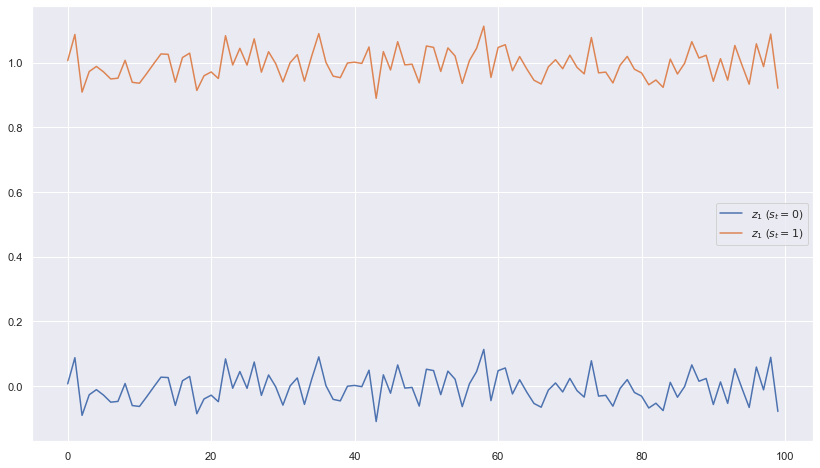

In [74]:
plt.figure(figsize=(14,8))
plt.plot(z1, label='$z_1$ ($s_t = 0$)')
plt.plot(z2, label='$z_1$ ($s_t = 1$)')
plt.legend()
plt.show()

In [75]:
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])

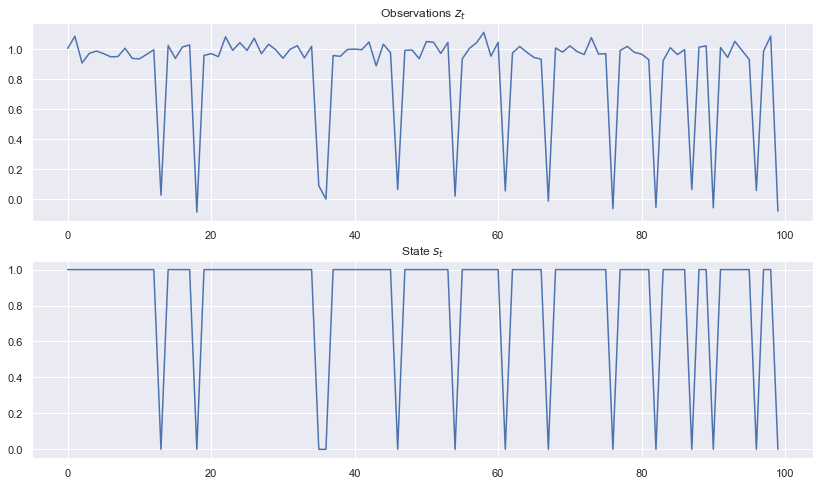

In [76]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

Это стационарный AR(1) процесс со средним $\dfrac{\alpha_0}{1-\beta}$ при $s_t=0$ и переключающийся на другой стационарный AR(1) процесс со средним $\dfrac{\alpha_0+\alpha_1}{1-\beta}$, когда $s_t$ переключается с 0 на 1.

- если $a_1 \ne 0$: два динамических паттерна в зависимости от значения переменной состояния $s_t$;
- в этом случае $z_t$ управляется двумя распределениями с разным средним;
- переменная $s_t$ отвечает за переключение между этими распределениями (режимами).

Только что показанный пример: $s_t \sim Bern(p),p=0.8$.

В этой модели $s_t$ не зависит от предыдущих и будущих реализаций, поэтому $z_t$ может сильно "прыгать" (часто переключаться между разными состояниями).

### Практика. Сгенерируйте модель с переключениями на основе двух моделей AR(1)

In [81]:
def make_ar2(a0, a1, a2, n):
    noise = np.random.normal(size=n)
    result = [a0 + noise[0], a0 + a1 * (a0 + noise[0]) + noise[1]]
    for i in range(2, n):
        result.append(a0 + a1*result[i-1] + a2*result[i-2] + noise[i])
    return np.array(result)

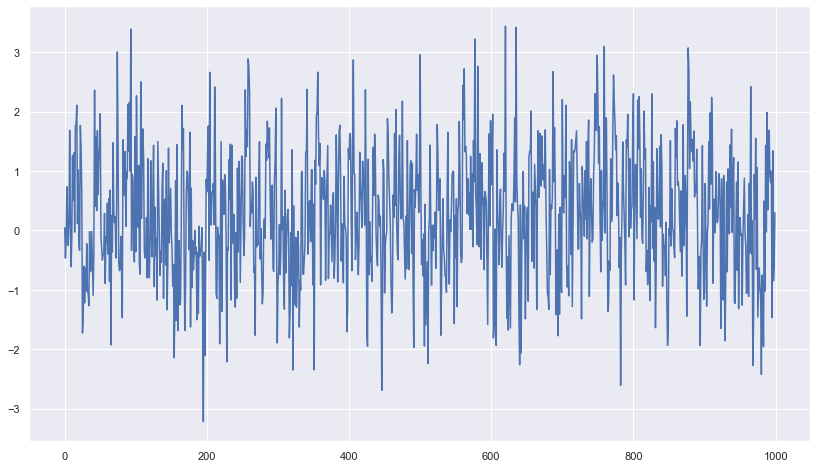

In [82]:
ar_1 = make_ar2(0.2, 0.2, 0.2, 1000)
plt.figure(figsize=(14,8))
plt.plot(ar_1)
plt.show()

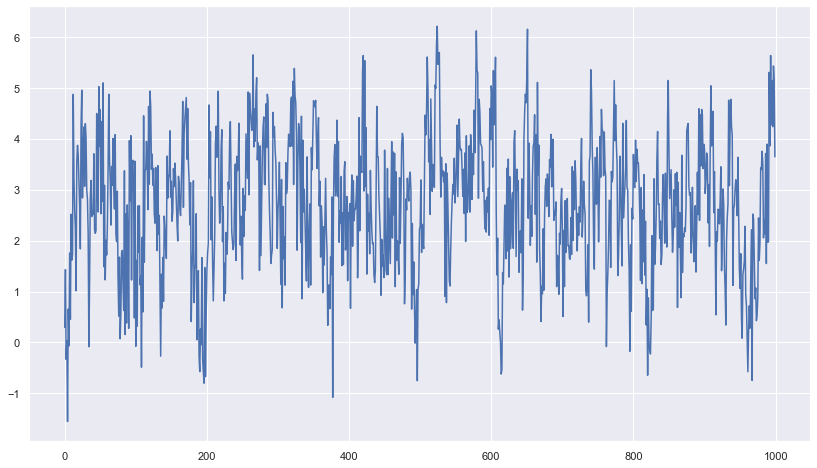

In [83]:
ar_2 = make_ar2(0.8, 0.3, 0.4, 1000)
plt.figure(figsize=(14,8))
plt.plot(ar_2)
plt.show()

In [90]:
s = np.random.binomial(n=1, p=0.5, size=1000)

In [91]:
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(ar_1[t])
    else:
        z.append(ar_2[t])

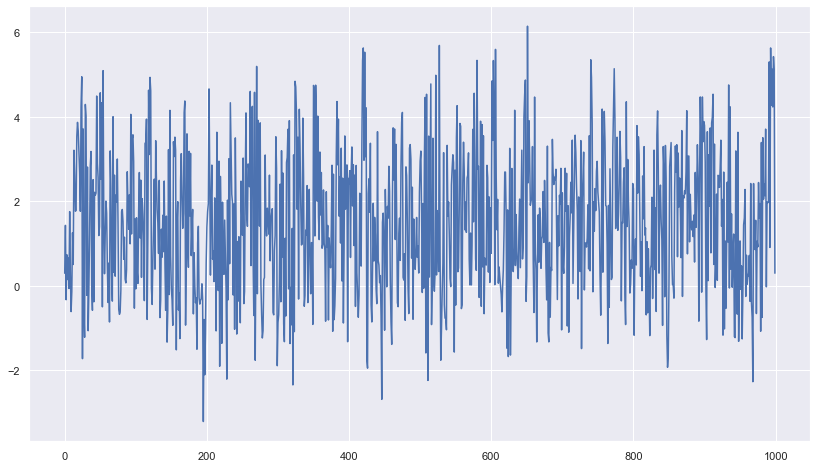

In [92]:
plt.figure(figsize=(14,8))
plt.plot(z)
plt.show()

## Что такое модель с марковским переключением?

Пусть, как раньше,

$z_t = \begin{cases} \alpha_0 + \beta z_{t-1} + \epsilon_t, & s_t = 0 \\ \alpha_0 + \alpha_1 + \beta z_{t-1} + \epsilon_t, & s_t = 1 \end{cases}$

Обозначим $s_t$ ненаблюдаемую переменную состояния, принимающую значения 0 или 1 согласно марковской цепи первого порядка:

$P=\begin{pmatrix} P(s_t=0|s_{t-1}=0) & P(s_t=1|s_{t-1}=0 \\ P(s_t=0|s_{t-1}=1) & P(s_t=1|s_{t-1}=1 \end{pmatrix} = \begin{pmatrix} p_{00} & p_{01} \\ p_{10} & p_{11} \end{pmatrix}$

где за $p_{ij},i,j∈\{0,1\}$ обозначена вероятность перехода в состояние $s_t=j$ из состояния $s_{i−1}=i$.

- Матрица перехода управляет случайным поведением переменной состояния и зависит только от двух параметров ($p00$
 и $p11$).
- Модель такого типа называют моделью с марковскими переключениями.
- Свойства $z_t$ определяются характеристиками распределения как $\epsilon_t$, так и переменной состояния $s_t$.
- В частности, марковская переменная состояния приводит к случайным и частым сменам режима, а вероятности перехода определяют персистентность каждого из режимов.

Важный факт: распределение наблюдений обусловлено ненаблюдаемой переменной состояния:
$Law(z_t)=Law(z_t|s_t)$

Например:
- $Law(z_t|s_t=0) = N(\dfrac{\alpha_0}{1-\beta}, \sigma_\epsilon^2)$
- $Law(z_t|s_t=1) = N(\dfrac{\alpha_0 + \alpha_1}{1-\beta}, \sigma_\epsilon^2)$

# Как сгенерировать траекторию модели с марковскими переключениями?

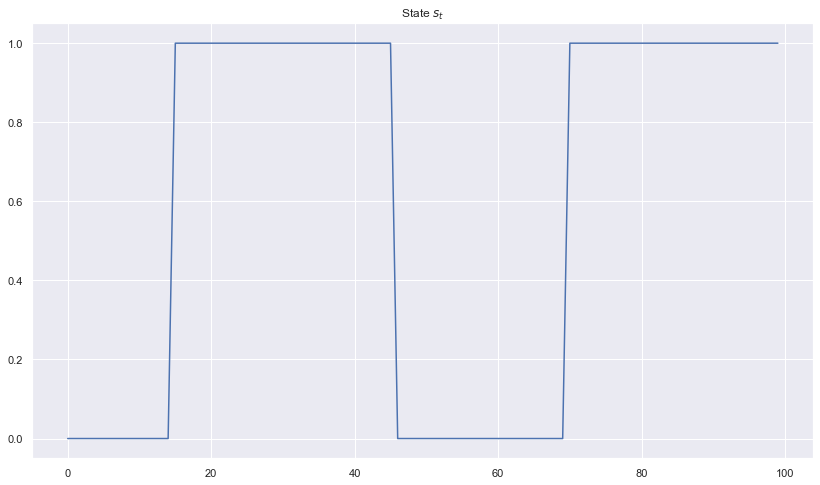

In [132]:
# 1. Генерирование марковской цепи с 2 скрытыми состояниями
P = np.array([
    [0.95, 0.05],
    [0.05, 0.95],
])
s = [0]
for t in range(99):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1], p=distribution))

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
axs.plot(s)
axs.set_title('State $s_t$')
plt.show()

In [133]:
# 2. Генерирование наблюдений из распределений, обусловленных ненаблюдаемым состоянием
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])

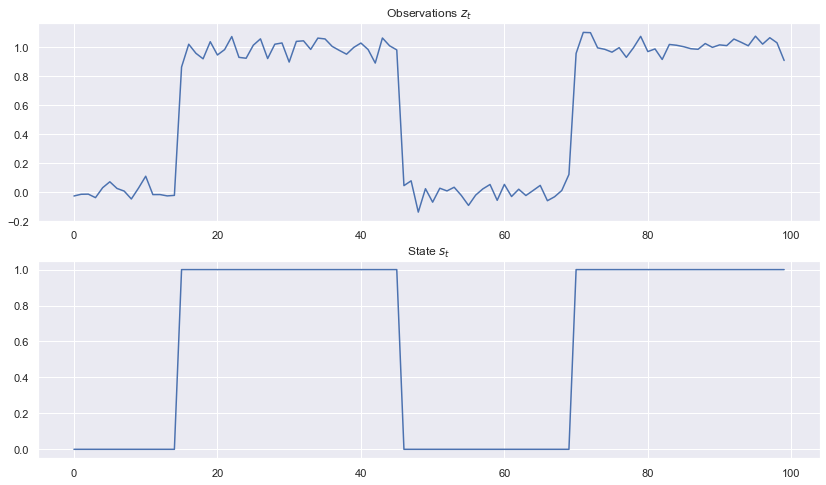

In [134]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

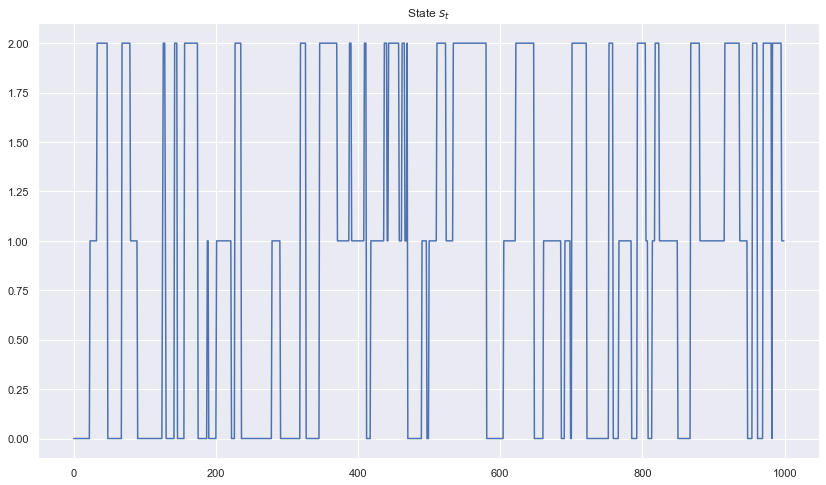

In [151]:
P = [
    [0.9, 0.05, 0.05],
    [0.05, 0.9, 0.05],
    [0.05, 0.05, 0.9]
]

ar_1=make_ar2(0.2,0.2,0.2,1000)
ar_2=make_ar2(0.3,0.3,0.3,1000)
ar_3=make_ar2(0.4,0.4,0.4,1000)

s = [0]
for t in range(999):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1, 2], p=distribution))

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
axs.plot(s)
axs.set_title('State $s_t$')
plt.show()

In [152]:
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(ar_1[t])
    elif s_t == 1:
        z.append(ar_2[t])
    else:
        z.append(ar_3[t])

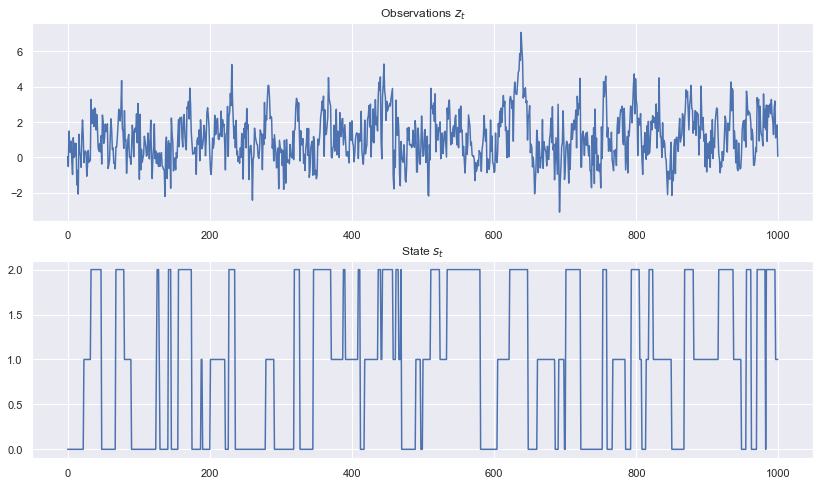

In [153]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

# Что такое скрытые марковские модели?

**Определение.** Скрытая марковская модель (первого порядка) - это вероятностная модель последовательности, которая состоит из набора наблюдаемых переменных $X={x_1,…,x_n}$, где $x_k \in R^d$, и набора латентных (или скрытых) 
переменных

$T={t_1,...,t_n}, t_k \in \{0,1\}^K, \sum \limits_{i=1}^K t_{ki} = 1$.

- латентные переменные являются бинарными и кодируют $K$ состояний: переменные состояния;
- значения наблюдаемого вектора $x_k$ в момент времени $k$ зависят только от скрытого состояния $t_k$;
- $t_k$, в свою очередь, зависит только от $t_{k−1}$.

Пусть в скрытой марковской модели $K$ состояний. Закодируем их состояния в момент времени $n$ бинарным вектором $t_n=(t_{n1},…,t_{nK})$ по правилу:

$t_{ij} = \begin{cases} 1, & \mbox{ система находится в состоянии j в момент времени i} \\ 0, & \mbox{иначе} \end{cases}$

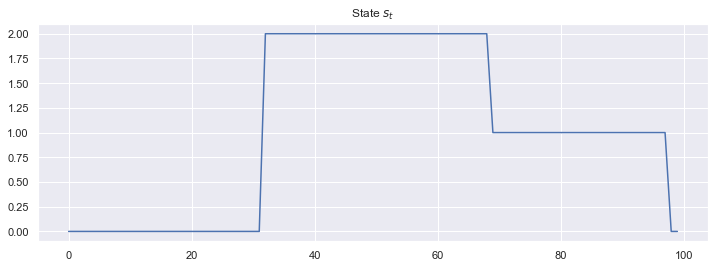

In [163]:
P = np.array([
    [0.95, 0.025, 0.025],
    [0.025, 0.95, 0.025],
    [0.025, 0.025, 0.95],
])
s = [0]
for t in range(99):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1, 2], p=distribution))
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(s)
_ = axs.set_title('State $s_t$')
plt.show()

In [164]:
np.array(s)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

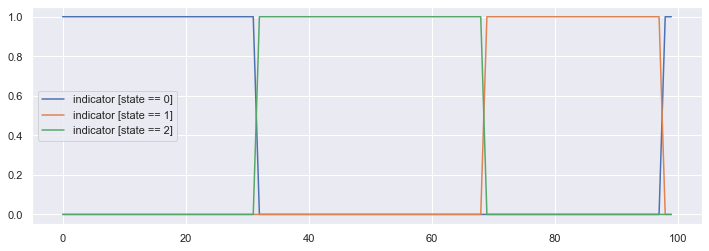

In [165]:
t = np.zeros((3, 100))
for i in range(3):
    t[i, :] = (np.array(s) == i).astype(int)
    
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
for i in range(3):
    _ = axs.plot(t[i, :], label='indicator [state == {}]'.format(i))
_ = axs.legend()

In [166]:
a, b = np.where(t)
assert np.all(np.array(a[np.argsort(b)]) == np.array(s))

Свойства такого формализма:

- в векторе $t_n$ может быть только один ненулевой элемент;
- предполагается, что система не может находиться в двух разных состояниях одновременно;
- распределение $t_n$ относительно $t_{n−1} -- p(t_n∣t_{n−1})$: матрица $A$, где $A_{ij}=p(t_{nj}=1∣t_{n−1,i}=1)$.

Стоит заметить, что $\sum \limits_{j=1}^K A_{ij}=1$. Следовательно, распределение можно записать следующим образом:

$p(t_n|t_{n-1}) = \prod\limits_{i=1}^K \prod\limits_{j=1}^K A_{ij}^{t_{n-1,i^{t_{nj}}}}$

- Начальное распределение $p(t1)$. Пусть $\pi_i=p(t_{1i}=1)$. Тогда

$p(t_1)=\prod\limits_{i=1}^K \pi_i^{t_{1i}}$.

- Обычно используются матрицы $A$ с преобладающими элементами на диагонали (более вероятно, что система не изменит своего состояния).
- Переменная $x_n$ зависит только от переменной состояния $t_n$: разумно рассматривать условное распределение $p(x_n∣t_n)$. Обычно предполагается, что оно известно с точностью до параметров $phi_k,k \in \{1,…,K\}$: то есть, если $t_{ni}=1$, то $p(x_n∣t_n)=p(x_n∣\phi_i)$.

$p(x_n∣t_n)=\prod\limits_{k=1}^K p(x_n∣\phi_k)^{t_{nk}}$.

Введённых параметров достаточно для полного описания скрытой марковской модели. Их собирают в набор параметров
$\Theta=(\pi,A,\phi)$, где $\pi=(\pi_1,…,\pi_K),\phi=(\phi1,…,\phi_K)$.


Основные задачи теории скрытых марковских процессов:
    
- **Обучение с учителем**. Пусть есть некоторая последовательность $X$, для которой известны латентные переменные $T$. По обучающей выборке нужно оценить набор параметров $\Theta$.
- **Сегментация**. Пусть известна последовательность наблюдаемых переменных $X$ и набор параметров $\Theta$. По ним нужно построить максимально правдоподобный набор латентных переменных $T$, то есть найти $argmax_T p(T∣X,\Theta)$.
- **Обучение без учителя**. Пусть известна последовательность наблюдаемых переменных $X$ и число состояний $K$. Нужно оценить набор параметров $\Theta$. Подзадача - **нахождение маргинального распределения**: найти $p(t_n∣X,\Theta)$.
- **Прогнозирование**. Пусть известна некоторая последовательность X длины N. Нужно оценить наблюдаемый вектор в момент времени $N+1$, то есть найти $p(x_{N+1}∣X)$.

# Как сгенерировать траекторию скрытой марковской модели?

In [167]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)

No handles with labels found to put in legend.


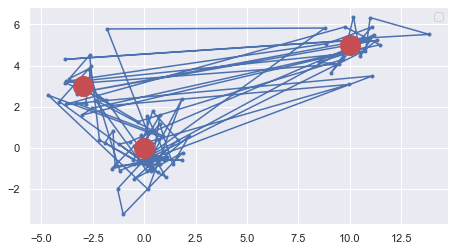

In [171]:
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(X[:, 1], X[:, 0], '.-')
# _ = axs.scatter(X[:, 1], X[:, 0])
_ = axs.plot(model.means_[:, 1], model.means_[:, 0], 'ro', ms=20)
_ = axs.legend()
axs.set_aspect('equal')

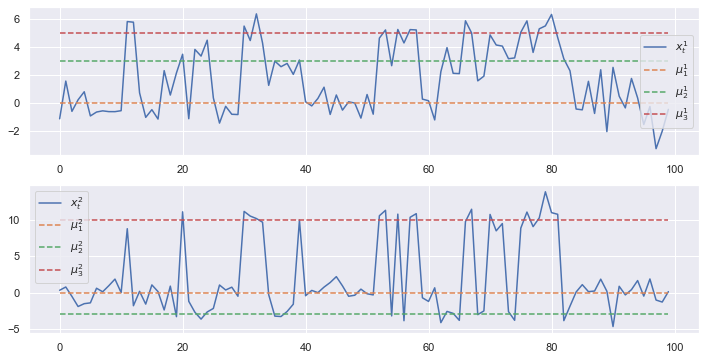

In [170]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
_ = axs[0].plot(X[:, 0], label='$x^1_t$')
for i in range(3):
    _ = axs[0].plot(range(len(X)), model.means_[i, 0] * np.ones(len(X)), '--', label='$\mu^1_{}$'.format(i+1))
_ = axs[0].legend()

_ = axs[1].plot(X[:, 1], label='$x^2_t$')
for i in range(3):
    _ = axs[1].plot(range(len(X)), model.means_[i, 1] * np.ones(len(X)), '--', label='$\mu^2_{}$'.format(i+1))
_ = axs[1].legend()

# Прогноз с использованием HMM

In [95]:
# !pip install hmmlearn

In [112]:
from hmmlearn.hmm import GaussianHMM

In [172]:
series = pd.read_csv("../Series/daily-total-female-births-in-cal.csv")["Count"]

In [173]:
values = series.values.reshape(-1,1)

In [174]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -1245.3909354932182
2 -1231.4145479769215
3 -1228.6376241958355
4 -1222.4806144371319
5 -1214.0854041790624
6 -1208.2775972401967
7 -1200.8324305909064
8 -1191.2120452545462
9 -1173.492223463474
10 -1159.8226949636662
11 -1157.6990214653915
12 -1135.6802958963804
13 -1136.710139903975


In [175]:
model = GaussianHMM(n_components=10, # лучше 12 т.к. -1135.6802958963804
                        covariance_type="diag",
                        n_iter=1000)

In [176]:
model.fit(values)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=10, n_iter=1000, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

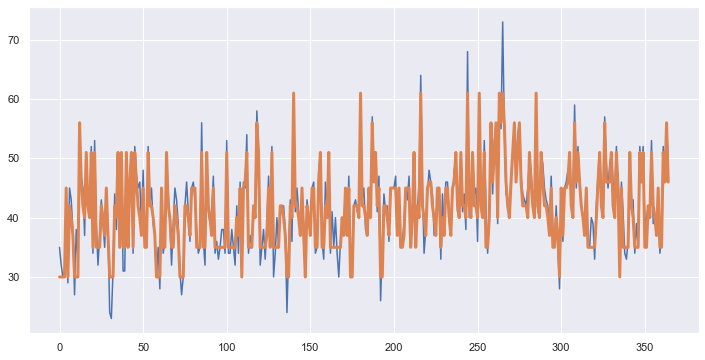

In [177]:
labels = model.predict(values)
means = np.zeros_like(values)

for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [178]:
model.transmat_.shape

(10, 10)

Эксперименты:
 * поварьировать число компонент HMM,
 * Для обучения HMM необходимо задать какое-то начальное приближение ее параметров. В этот процесс можно вмешаться с помощью явного задания априорного распределения с помощью спецификации model.transmat_. Другие параметры модели доступны по `model.<TAB>`
 * HMM обучается на основе градиентного спуска в пространстве параметров (оптимизируется правдоподобие выборки). Различные инициализации приводят (в общем случае) к различным результатам оптимизации. Попробуйте обучить набор моделей HMM для понимания, насколько устойчиво обучение. Посмотрите на model.score(X) для оценки логарифма правдоподобия обучающей выборки.
 * Число итераций, заданное для обучения, влияет на качество модели. Модель будет продолжать оптимизацию, пока не прошло n_iter шагов градиентного спуска или пока изменение score выше, чем заданный порог tol. Заметьте, что в зависимости от используемых данных модель может и не окончить оптимизацию за n_iter шагов.

## Практика. Спрогнозируйте ряд на 10 измерений вперед (через среднее каждой компоненты)

# Материалы

- http://quantile.ru/11/11-CK.pdf

In [ ]:
pass

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [158]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

- Объеденим тома текста "война и мир"
- Очистим
- Оставим только русские буквы и символы пробела
- Построим матрицу переходных вероятностей

In [90]:
regex = re.compile("[а-я]+")
def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""
    

text = ""
for i in range(1, 5):
    with open(f'war_and_peace/tom_{i}.txt', 'r') as f:
        tom = f.read().lower()
    
    text = text + words_only(tom) + " "
    text = text.replace("  ", " ")


text[:2000]

'лев толстой война и мир том том часть первая часть орая часть третья том лев николаевич толстой война и мир том часть первая е поместья мой верный раб ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я вас предупреждаю если вы мне не скажете что у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста право я верю что он антихрист я вас больше не знаю вы уж не друг мой вы уж не мой верный раб как вы говорите ну здравствуйте здравствуйте я вижу что я вас пугаю садитесь и рассказывайте так говорила в июле года известная анна павловна шерер фрейлина и приближенная императрицы марии феодоровны встречая важного и чиновного князя василия первого приехавшего на ее вечер анна павловна кашляла несколько дней у нее был грипп как она говорила грипп был тогда новое слово употреблявшееся только редкими в записочках разосланных утром с красным лакеем было написано без различия во всех или если вас граф или князь нет в виду ничего лучшего 

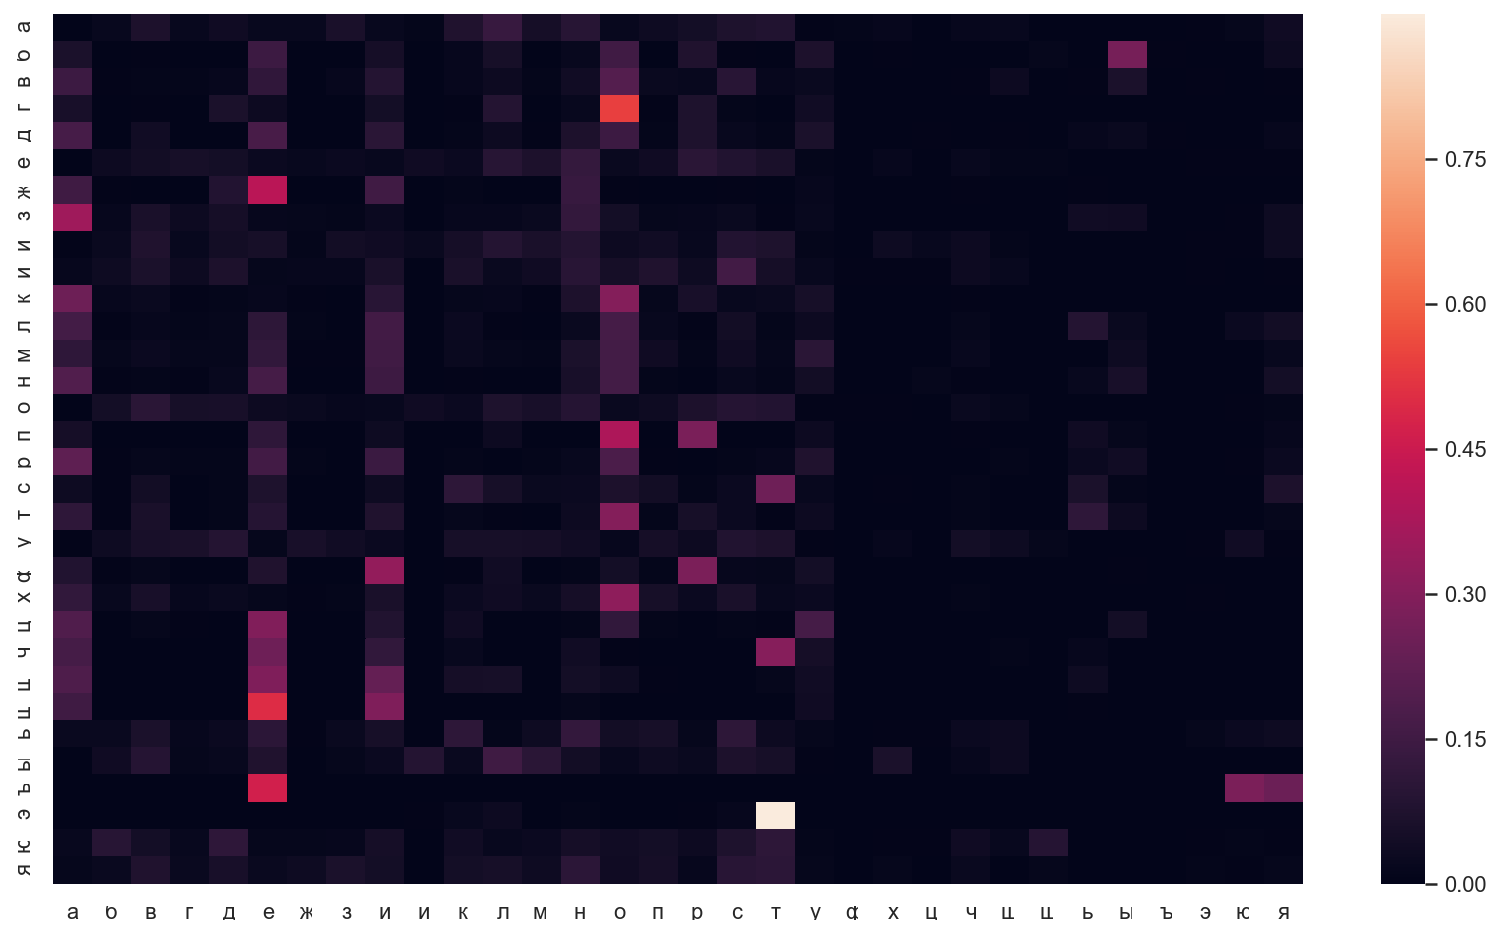

In [91]:
text_ru = re.sub('[^а-я]', '', text)

RU = 'абвгдежзийклмнопрстуфхцчшщьыъэюя' # исключая 'ё'
POS = {l: i for i, l in enumerate(RU)}

probabilities = np.zeros((len(RU), len(RU)))
# probabilities = np.ones((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text_ru[:-1], text_ru[1:]):
#     if (cp!=' ') and (cn!=' '):
#         probabilities[POS[cp], POS[cn]] += 1
    probabilities[POS[cp], POS[cn]] += 1

probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
df = pd.DataFrame(probabilities, index=(c for c in RU), columns=(c for c in RU))

plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

- Посчитаем вероятность встретить строку из 4-х символов, которая начинается 'п', а кончается на 'р'; 
- Используя матрицу переходных вероятностей сгенерируем слово, начинающееся с буквы 'Б' и имеющее длину 8-мь символов _len(words)=9_

In [147]:
start = POS['п']
end = POS['р']
prior = 1. / len(RU)
d1 = {}
d2 = {}

for c1 in RU:
    for c2 in RU:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        if proba > 0:
            d1[''.join(['п', c1, c2, 'р'])]='{}'.format(proba)
            d2[''.join(['п', c1, c2, 'р'])]= proba
#             print(''.join(['п', c1, c2, 'р']), proba)


for k, v in d1.items():
    print(k, v)
    if 'панр' in k:
        break


print("\n#######d1#######")
prr = np.array([float(v) for i in range(len(d1)) for k, v in d1.items()]).sum()  
print(prr)

pr = 0
for i in range(len(d1)):
    for k, v in d1.items():
        pr =+ float(v)
print(pr)

from decimal import *
getcontext().prec = 30
print(sum([Decimal(v) for k, v in d1.items()]))

print("\n#######d2#######")
prr_2 = np.array([float(v) for i in range(len(d2)) for k, v in d2.items()]).sum()  
print(prr_2)

pr_2 = 0
for i in range(len(d2)):
    for k, v in d2.items():
        pr_2 =+ v
print(pr_2)

from decimal import *
getcontext().prec = 30
print(sum([Decimal(v) for k, v in d2.items()]))

паар 2.5995388227900577e-07
пабр 2.2790682068014613e-06
павр 2.306313096837757e-06
пагр 2.100507798345619e-06
падр 4.432164840939361e-06
паер 3.377530375866005e-06
пажр 1.59737552856315e-08
пазр 1.6929849915253648e-06
паир 5.755102751274013e-07
пайр 5.047226450451695e-07
пакр 6.9097458010584755e-06
палр 1.0456816034100697e-06
памр 6.661620900365866e-07
панр 4.324340722514072e-07

#######d1#######
1.1111608569369158
8.430482662587596e-08
0.001333926598963883943090030426

#######d2#######
1.1111608569369158
8.430482662587596e-08
0.00133392659896388394189158046538


In [197]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RU), p=probabilities[index])
    s.append(next_char)

print (''.join(s))
# print (len(''.join(s)))

бушелимик


- Выберите ряд и оцените его через HMM
- Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда

In [154]:
series = pd.read_csv("../Series/weekly-closings-of-the-dowjones-.csv")["Close"].dropna()

In [156]:
values = series.values.reshape(-1,1)

In [164]:
d3 = {}

for n in range(1, 50):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    d3['{}'.format(n)]=model.score(values)
#     print (n, model.score(values))

Fitting a model with 167 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 223 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 254 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 287 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 322 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 359 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 398 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 439 free scalar parameters with only 162 data points will result in a degenerate so

In [174]:
d3['49']

-422.1936479858219

In [175]:
model = GaussianHMM(n_components=49,
                        covariance_type="diag",
                        n_iter=1000)

In [176]:
model.fit(values)

Fitting a model with 2498 free scalar parameters with only 162 data points will result in a degenerate solution.


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=49, n_iter=1000, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [177]:
labels = model.predict(values)
means = np.zeros_like(values)

for i in range(model.n_components):
    means[labels == i] = model.means_[i]

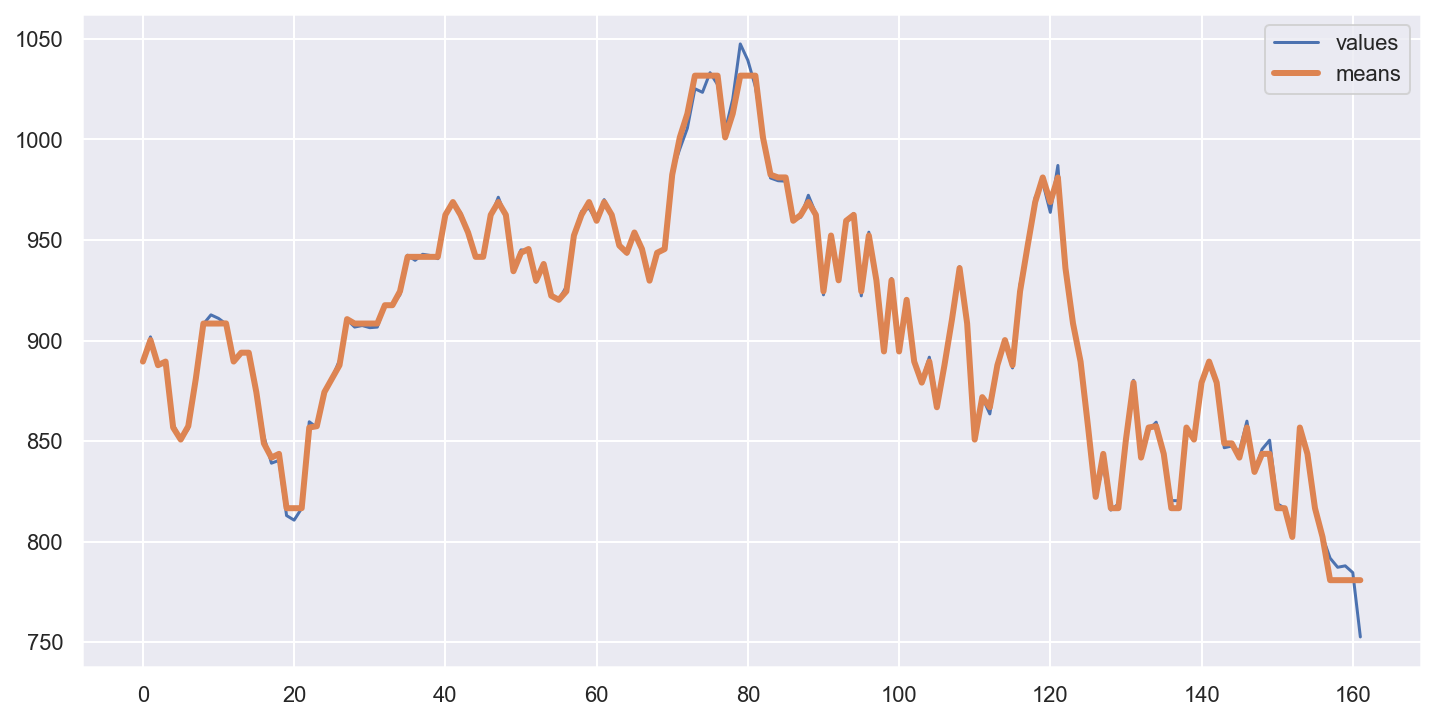

In [182]:
plt.figure(figsize=(12, 6))
plt.plot(values, label='values')
plt.plot(means, linewidth=3, label='means')
plt.legend()
plt.show()

In [ ]:
pass